# Exploratory Data Analysis of the Titanic Dataset

In [3]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import math
from matplotlib.pyplot import scatter as plt_scatter

C:\Users\Fazuximy\Anaconda3\envs\titanic\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Fazuximy\Anaconda3\envs\titanic\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Fazuximy\Anaconda3\envs\titanic\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Fazuximy\Anaconda3\envs\titanic\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\Fazuximy\Anaconda3\envs\titanic\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
path = "Z:\\python_stuff\\titanic\\titanic\\"
dataset_path = path+"datasets\\"

## Features and what they mean

In [5]:
training_data = pd.read_csv(dataset_path+"train.csv")

### List of Features:
##### survival - Survival - 0 = No, 1 = Yes
##### pclass - Ticket - class 1 = 1st, 2 = 2nd, 3 = 3rd
##### sex - Sex	
##### Age - Age in years	
##### sibsp - number of siblings / spouses aboard the Titanic	
##### parch - number of parents / children aboard the Titanic	
##### ticket - Ticket number	
##### fare - Passenger fare	
##### cabin - Cabin number	
##### embarked - Port of Embarkation - C = Cherbourg, Q = Queenstown, S = Southampton

## Applying feature engineering to the Titanic dataset to get extra features

In [6]:
person_title = [re.findall("\,\s([\w+|\w+\s+\w]+\.)",i)[0] if len(re.findall("\,\s([\w+|\w+\s+\w]+\.)",i)) > 0 else None for i in training_data["Name"]]
training_data["title"] = person_title
training_data["log_fare"] = [math.log(i) if i != 0 else 0 for i in training_data["Fare"]]

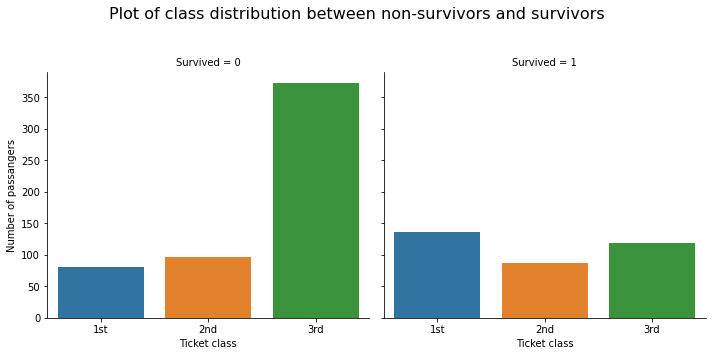

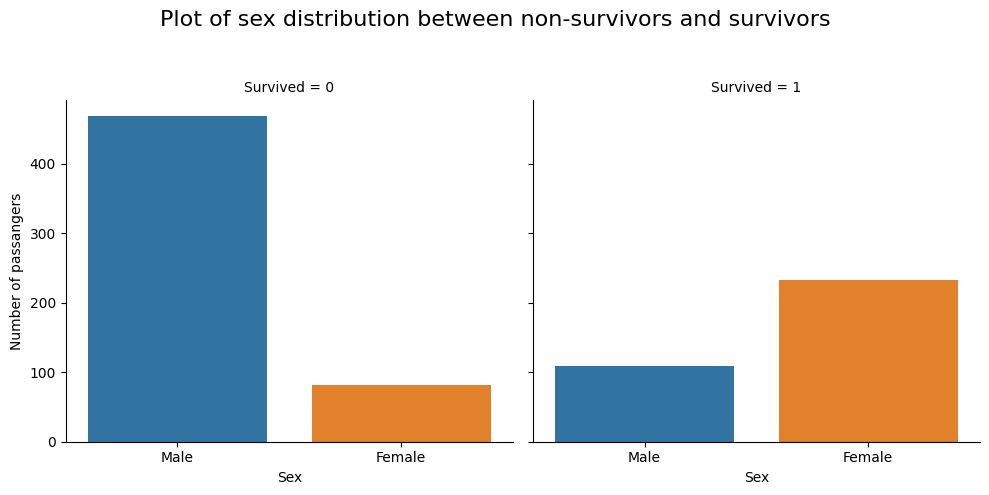

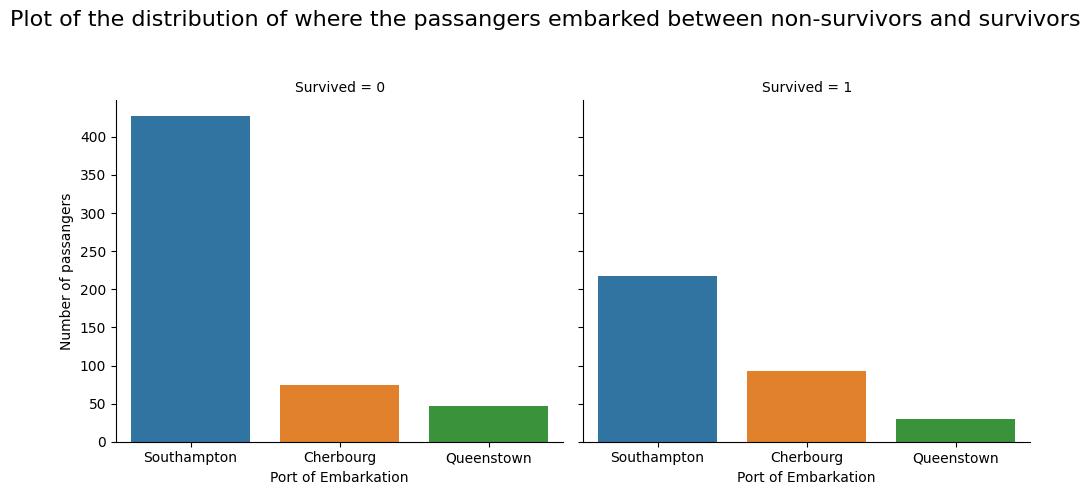

In [7]:
ax = sns.catplot(x="Pclass", col="Survived", data=training_data, ci = None, kind = "count").set(ylabel = 'Number of passangers', xlabel = 'Ticket class')
ax.fig.subplots_adjust(top=0.8)
ax.fig.suptitle('Plot of class distribution between non-survivors and survivors', fontsize=16)
ax.set_xticklabels(["1st","2nd","3rd"])

ax = sns.catplot(x="Sex", col="Survived", data=training_data, ci = None, kind = "count").set(ylabel = 'Number of passangers', xlabel = 'Sex')
ax.fig.subplots_adjust(top=0.8)
ax.fig.suptitle('Plot of sex distribution between non-survivors and survivors', fontsize=16)
ax.set_xticklabels(["Male","Female"])

ax = sns.catplot(x="Embarked", col="Survived", data=training_data, ci = None, kind = "count").set(ylabel = 'Number of passangers', xlabel = 'Port of Embarkation')
ax.fig.subplots_adjust(top=0.8)
ax.fig.suptitle('Plot of the distribution of where the passangers embarked between non-survivors and survivors', fontsize=16)
ax.set_xticklabels(["Southampton", "Cherbourg", "Queenstown"])

In [8]:
from scipy import stats

In [9]:
def chi2_square_test(_df, _test_group, _test_group_value_list, _freq_group):
    _group_list = []
    for value in _test_group_value_list:
        _group_list.append(_df[_df[_test_group] == value][_freq_group].value_counts())
    
    _contingency_table = np.array([i.values for i in _group_list])
    
    _chi_square_result = stats.chi2_contingency(_contingency_table)
    
    _p_value = _chi_square_result[1]
    
    if chi_square_embark[1] <= 0.05:
        print("The P-value is below the critical value so the null hypothesis is rejected. The P-value is: {}".format(_p_value))
        print("We can say with high confidence that the difference in  frequency for the test groups are not due to chance alone.")
    if chi_square_embark[1] > 0.05:
        print("The P-value is above the critical value so the null-hypothesis cannot be rejected: {}".format(_p_value))
    
    return _p_value
    

### Null hypothesis: The frequency of passenger embarkation is the same for the surviving and non-surviving passengers

In [80]:
chi2_square_test(training_data, "Survived", [1,0], "Embarked")

The P-value is below the critical value so the null hypothesis is rejected. The P-value is: 1.769922284120912e-06
We can say with high confidence that the difference in  frequency for the test groups are not due to chance alone.


1.769922284120912e-06

### Null hypothesis: The frequency of the sex of passengers is the same for the surviving and non-surviving passengers

In [79]:
chi2_square_test(training_data, "Survived", [1,0], "Sex")

The P-value is below the critical value so the null hypothesis is rejected. The P-value is: 2.199000710497729e-09
We can say with high confidence that the difference in  frequency for the test groups are not due to chance alone.


2.199000710497729e-09

### Null hypothesis: The frequency of the class of passengers is the same for the surviving and non-surviving passengers

In [83]:
chi2_square_test(training_data, "Survived", [1,0], "Pclass")

The P-value is below the critical value so the null hypothesis is rejected. The P-value is: 1.95469215276003e-15
We can say with high confidence that the difference in  frequency for the test groups are not due to chance alone.


1.95469215276003e-15

Text(0.5, 0.98, 'Plot of the distribution of where the passangers embarked between non-survivors and survivors')

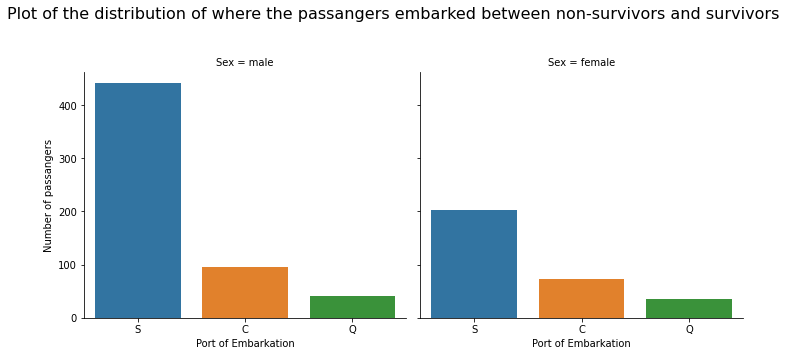

In [28]:
ax = sns.catplot(x="Embarked", col="Sex", data=training_data, ci = None, kind = "count").set(ylabel = 'Number of passangers', xlabel = 'Port of Embarkation')
ax.fig.subplots_adjust(top=0.8)
ax.fig.suptitle('Plot of the distribution of where the passangers embarked between non-survivors and survivors', fontsize=16)

Text(0.5, 0.98, 'Plot of the distribution of where the passangers embarked between non-survivors and survivors')

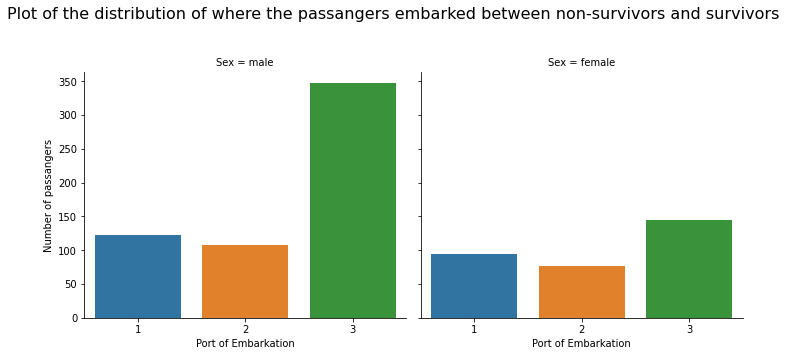

In [29]:
ax = sns.catplot(x="Pclass", col="Sex", data=training_data, ci = None, kind = "count").set(ylabel = 'Number of passangers', xlabel = 'Port of Embarkation')
ax.fig.subplots_adjust(top=0.8)
ax.fig.suptitle('Plot of the distribution of where the passangers embarked between non-survivors and survivors', fontsize=16)

In [1]:
# Make simple classifier based on data analysis. Men + 3rd class. What are the performance metrics? How well does this simple "classifier" work based on an EDA

In [12]:
training_data["Age"].dropna()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Count'>

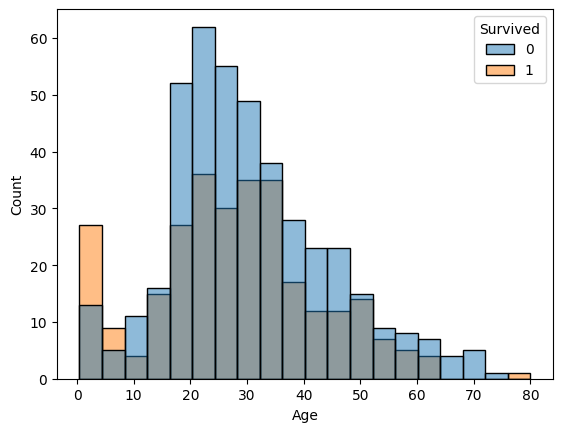

In [14]:
sns.histplot(x="Age", hue="Survived", data=training_data)

In [33]:
age_survive_percentage = training_data[training_data["Survived"] == 1]["Age"].value_counts(bins = list(range(0,85,5))) / training_data["Age"].value_counts(bins = list(range(0,85,5))) * 100

In [34]:
age_survive_percentage

(-0.001, 5.0]     70.454545
(5.0, 10.0]       35.000000
(10.0, 15.0]      57.894737
(15.0, 20.0]      34.375000
(20.0, 25.0]      34.426230
(25.0, 30.0]      38.888889
(30.0, 35.0]      46.590909
(35.0, 40.0]      41.791045
(40.0, 45.0]      36.170213
(45.0, 50.0]      41.025641
(50.0, 55.0]      41.666667
(55.0, 60.0]      38.888889
(60.0, 65.0]      28.571429
(65.0, 70.0]       0.000000
(70.0, 75.0]       0.000000
(75.0, 80.0]     100.000000
Name: Age, dtype: float64

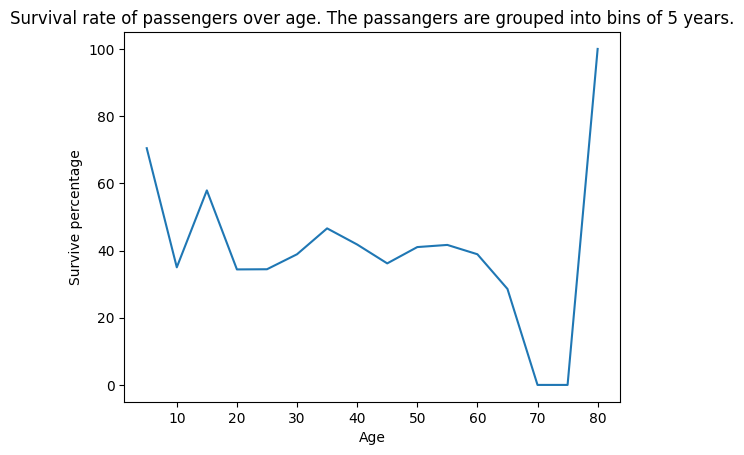

In [65]:
ax = sns.lineplot(x = age_survive_percentage.index.right, y = age_survive_percentage)
ax.set(ylabel = 'Survive percentage', xlabel = 'Age', title = 'Survival rate of passengers over age. The passangers are grouped into bins of 5 years.')
print("")